# F1tenth

In [2]:
import gym
import numpy as np



In [2]:
pip freeze | grep llvm


llvmlite==0.37.0
Note: you may need to restart the kernel to use updated packages.


In [16]:
import torch

t = torch.tensor([6, -3])
print(0.5 * torch.tanh(t))
torch.clamp(t, -0.5, 0.5) + 0.5

tensor([ 0.5000, -0.4975])


tensor([0.5000, 0.5000])

In [3]:
racecar_env = gym.make(
    'f110_gym:f110-v0',
    map='./f1tenth_gym/gym/f110_gym/envs/maps/vegas',
    map_ext='.png'
)

In [9]:
obs, step_reward, done, info = racecar_env.reset(
    poses=np.array([[0., 0., 0.], # pose of ego
             [2., 0., 0.]])  # pose of 2nd agent
) 

obs

{'ego_idx': 0,
 'scans': [array([ 1.15195213,  1.17882766,  1.15748376, ..., 14.07912092,
         14.09524106, 14.1282331 ]),
  array([2.16312959, 2.14000512, 2.14827918, ..., 7.18005984, 7.33710506,
         7.60729993])],
 'poses_x': [0.0, 2.0],
 'poses_y': [0.0, 0.0],
 'poses_theta': [0.0, 0.0],
 'linear_vels_x': [0.0, 0.0],
 'linear_vels_y': [0.0, 0.0],
 'ang_vels_z': [0.0, 0.0],
 'collisions': array([0., 0.]),
 'lap_times': array([0.01, 0.01]),
 'lap_counts': array([0., 0.])}

In [14]:
state = np.concatenate([
    obs['scans'][0],
    np.array(obs['linear_vels_x'][:1]),
    np.array(obs['linear_vels_y'][:1]),
])
state.shape

(1082,)

In [15]:
speeds = np.random.rand(2, 1)*2
pi_4 = 3.1415/8
pi_2 = 3.1415/4
angles = np.random.rand(2, 1)*pi_2-pi_4
actions = np.concatenate([angles, speeds], axis=1)

actions

array([[0.09967185, 0.90196624],
       [0.11654598, 1.06044759]])

In [4]:
## action consists of ndarray(num_agent, 2) 0: steering angle 1: velocity
## the reward function is only for the first agent

import time

steps = 0

obs, step_reward, done, info = racecar_env.reset(
    poses=np.array([[0., 0., 0.], # pose of ego
             [2., 2., 0.]])  # pose of 2nd agent
) 

rewards = []

while not done:
    
    speeds = np.random.rand(2, 1)*20
    pi_4 = 3.1415/8
    pi_2 = 3.1415/4
    speeds[1][0] = 0.1
    angles = np.random.rand(2, 1)*pi_2-pi_4
    actions = np.concatenate([angles, speeds], axis=1)

    obs, step_reward, done, info = racecar_env.step(actions)
    rewards.append(step_reward)
    
    racecar_env.render()
    steps += 1
    
    if steps > 500:
        break

KeyboardInterrupt: 

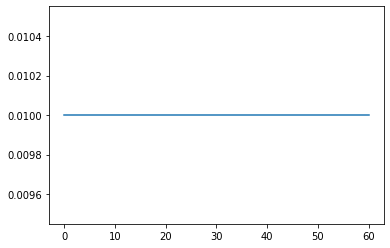

In [130]:
import matplotlib.pyplot as plt

plt.plot(rewards)

In [1]:
%load_ext autoreload
%autoreload 2

from td3 import td3_trainer, env, model_path, max_steps, DETERMINISTIC
import numpy as np

td3_trainer.load_model(model_path)
for eps in range(10):
    state =  env.reset()
    env.render()   
    episode_reward = 0

    for step in range(max_steps):
        action = td3_trainer.policy_net.get_action(state, deterministic = DETERMINISTIC, explore_noise_scale=.1)
        #action = np.array([-0.5, 1]).astype(float)
        next_state, reward, done, _ = env.step(action.astype(float))
        if done:
            break
        env.render() 

        episode_reward += reward
        state=next_state

    print('Episode: ', eps, '| Episode Reward: ', episode_reward)

pygame 2.1.2 (SDL 2.0.16, Python 3.8.10)
Hello from the pygame community. https://www.pygame.org/contribute.html
cpu
Q Network (1,2):  QNetwork(
  (linear1): Linear(in_features=219, out_features=300, bias=True)
  (linear2): Linear(in_features=300, out_features=300, bias=True)
  (linear3): Linear(in_features=300, out_features=300, bias=True)
  (linear4): Linear(in_features=300, out_features=1, bias=True)
)
Policy Network:  PolicyNetwork(
  (linear1): Linear(in_features=217, out_features=300, bias=True)
  (linear2): Linear(in_features=300, out_features=300, bias=True)
  (linear3): Linear(in_features=300, out_features=300, bias=True)
  (mean_linear): Linear(in_features=300, out_features=2, bias=True)
  (log_std_linear): Linear(in_features=300, out_features=2, bias=True)
)


/home/navid/venv/genv/lib/python3.8/site-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode:  0 | Episode Reward:  8.787665573670647
Episode:  1 | Episode Reward:  8.047385168826867
Episode:  2 | Episode Reward:  9.11994139508716
Episode:  3 | Episode Reward:  8.605661363663103
Episode:  4 | Episode Reward:  9.373540045726635
Episode:  5 | Episode Reward:  8.813879310563026
Episode:  6 | Episode Reward:  8.531041606186319
Episode:  7 | Episode Reward:  8.41982477694825
Episode:  8 | Episode Reward:  7.086363955582367
Episode:  9 | Episode Reward:  9.908702921396323


# RAY

In [26]:
from ray.rllib.agents.ppo import PPOTrainer

ModuleNotFoundError: No module named 'ray'

In [5]:

# Configure the algorithm.
config = {
    # Environment (RLlib understands openAI gym registered strings).
    "env": "Taxi-v3",
    # Use 2 environment workers (aka "rollout workers") that parallelly
    # collect samples from their own environment clone(s).
    "num_workers": 2,
    # Change this to "framework: torch", if you are using PyTorch.
    # Also, use "framework: tf2" for tf2.x eager execution.
    "framework": "torch",
    # Tweak the default model provided automatically by RLlib,
    # given the environment's observation- and action spaces.
    "model": {
        "fcnet_hiddens": [64, 64],
        "fcnet_activation": "relu",
    },
    # Set up a separate evaluation worker set for the
    # `trainer.evaluate()` call after training (see below).
    "evaluation_num_workers": 1,
    # Only for evaluation runs, render the env.
    "evaluation_config": {
        "render_env": True,
    },
}

# Create our RLlib Trainer.
trainer = PPOTrainer(config=config)

# Run it for n training iterations. A training iteration includes
# parallel sample collection by the environment workers as well as
# loss calculation on the collected batch and a model update.
for _ in range(3):
    print(trainer.train())

# Evaluate the trained Trainer (and render each timestep to the shell's
# output).
trainer.evaluate()


NameError: name 'PPOTrainer' is not defined

# RAY and F110 env

In [20]:
action = np.random.rand(2)
print(action.shape, action)
action = action.reshape(1, 2)
action = np.repeat(action, repeats=2, axis=0)
print(action, action.shape)

(2,) [0.07522247 0.58638562]
[[0.07522247 0.58638562]
 [0.07522247 0.58638562]] (2, 2)


In [19]:
# import gym, ray
# from ray.rllib.agents import ppo

config = {
    "num_workers": 1,
    "framework": "torch",
    "model": {
        "fcnet_hiddens": [512, 512, 128],
        "fcnet_activation": "relu",
    },
    "evaluation_num_workers": 1,
    "evaluation_config": {
        "render_env": False,
    },
}



class F110Env(gym.Env):
    def __init__(self, env_config):
        self.action_space = gym.spaces.Box(low=0, high=1, shape=(2,))
        self.observation_space = gym.spaces.Box(low=-np.inf, high=np.inf, shape=(1082,), dtype=np.float32)
        self.env = gym.make(
            'f110_gym:f110-v0',
            map='./f1tenth_gym/gym/f110_gym/envs/maps/vegas',
            map_ext='.png'
        )
        self.reset()
        
    def reset(self):
        obs, step_reward, done, info = self.env.reset(
            poses=np.array([[0., 0., 0.], 
                     [2., 2., 0.]]) 
        )
        return self.to_vector_state(obs)
    
    def to_vector_state(self, obs):
        state = np.concatenate([
            obs['scans'][0],
            np.array(obs['linear_vels_x'][:1]),
            np.array(obs['linear_vels_y'][:1]),
        ])
        return list(state.reshape(1082,))
    
    def step(self, action):
        action[0] = action[0]*pi_2-pi_4
        action[1] = action[1]*5
        action = action.reshape(1, 2)
        action = np.repeat(action, repeats=2, axis=0)
        obs, step_reward, done, info = self.env.step(action)
        next_state = self.to_vector_state(obs)
        step_reward = step_reward + np.mean(obs['linear_vels_x'])*0.05
        return next_state, step_reward, done, info
    
# ray.shutdown()
# ray.init()
# trainer = ppo.PPOTrainer(env=F110Env, config=config)

# for _ in range(100):
#     result = trainer.train()
#     print(result['episode_reward_mean'])
    
    


In [109]:
trainer.save("./rllib_checkpoint")

2022-02-09 16:38:59,610	WARNING deprecation.py:45 -- DeprecationWarning: `clear_buffer` has been deprecated. Use `Filter.reset_buffer()` instead. This will raise an error in the future!


'./rllib_checkpoint/checkpoint_000038/checkpoint-38'

In [ ]:
ltrainer = ppo.PPOTrainer(env=F110Env, config=config)
ltrainer.restore('./rllib_checkpoint/checkpoint_000038/checkpoint-38')

2022-02-11 19:16:21,867	WARNING trainer.py:2279 -- You have specified 1 evaluation workers, but your `evaluation_interval` is None! Therefore, evaluation will not occur automatically with each call to `Trainer.train()`. Instead, you will have to call `Trainer.evaluate()` manually in order to trigger an evaluation run.


In [ ]:
ltrainer.evaluate()

In [108]:
done = False
env = F110Env({})
obs = env.reset()

while not done:
    action = ltrainer.compute_action(obs)
    obs, reward, done, _ = env.step(action)
    env.render()
    


[-0.02800139  7.9640665 ]
[-1.0669782  1.2582749]
[-0.64651614  4.033072  ]
[0.34437037 6.29025   ]
[-0.96513   7.858917]
[ 0.38388255 10.68701   ]
[ 0.7011106 -4.458651 ]
[ 0.33854118 -6.306336  ]
[1.3163129 3.3928802]
[0.2632883 6.5327244]
[ 0.74914044 -1.0322088 ]
[-0.8327759  1.248816 ]
[-0.8120609  3.9742837]
[0.9450792 9.447499 ]
[-0.10866603  6.18229   ]
[1.5990632 1.7291855]
[-0.482437  -1.7386931]
[-0.6618924 -0.7232705]
[0.9849169 1.6084292]
[-1.4258287 16.109604 ]
[-1.236001  9.650803]
[-0.05287087 -6.2397857 ]
[-5.9984892e-04  7.4744325e+00]
[-1.5672288  5.383696 ]
[-0.07740902  3.6621609 ]
[ 0.24960616 -2.189745  ]
[-1.6465842  6.796934 ]
[-0.42068464 14.295907  ]
[1.3242775 3.497864 ]
[ 0.30317527 14.7062435 ]
[0.22612095 1.8120784 ]
[0.53837186 1.1424515 ]
[ 0.92259556 -1.0658517 ]
[4.8463526e-03 6.6530800e+00]
[ 1.155143  -1.1980717]
[-1.3240283  3.6043673]
[-1.30215  7.21682]
[-1.2342508  4.6008244]
[0.413349  4.1604114]
[ 0.6631138 -1.5703815]
[-0.67363006 -0.27384594

[-2.337758  1.620537]
[-1.3408599 21.77844  ]
[-0.31824258 13.917317  ]
[-2.2217166  6.054159 ]
[-1.4341004  -0.14511287]
[-3.9012122  8.832368 ]
[-2.1280289  8.66172  ]
[-1.6182419  0.4193622]
[-1.02378    7.3522053]
[-0.62335247  9.136371  ]
[1.1946698 9.267421 ]
[-2.8689306 -4.0417724]
[ -0.56816316 -19.075853  ]
[-0.645579 19.034216]
[-2.9814954  4.6970577]
[0.27253506 5.5228605 ]
[ -1.4690522 -15.869078 ]
[-0.17806305 -6.947774  ]
[-0.42399275 -8.862218  ]
[ 1.5538825 -5.4835176]
[4.0126977 8.830212 ]
[3.8563173 3.7554944]
[-2.420405  2.45597 ]
[0.56993765 0.21501288]
[-2.1899457 13.12737  ]
[  0.18472183 -18.771986  ]
[ 1.2338411 -5.122177 ]
[-2.8113165 -1.2287495]
[1.5168458 1.6409864]
[ 2.817621 21.219904]
[-1.7703922 16.325089 ]
[-2.0075834 11.998442 ]
[-3.916715  -6.2096734]
[-0.64485735 13.04151   ]
[-4.067502   -0.35084412]
[-3.3216827 13.006231 ]
[ -2.3678544 -10.315713 ]
[-0.14666033  0.2772969 ]
[-0.91937155 -3.1567936 ]
[-1.6032264 14.069889 ]
[-1.0166903  8.766538 ]
[-

[-2.6763065 -1.2380729]
[-0.34538776  1.5567214 ]
[-1.5674195  9.178766 ]
[-1.84212  10.852358]
[-0.82653105  4.5978427 ]
[-0.8115717 -0.3197235]
[-1.1308975 -5.4569187]
[-1.3338933 12.075181 ]
[-1.1508414  -0.20112574]
[-1.720544 25.123497]
[-0.78220725 12.571682  ]
[-0.9873006 17.158548 ]
[-0.60869455 10.913296  ]
[ 0.11842649 23.718304  ]
[-2.0812173  1.4711833]
[-2.0044594  5.883436 ]
[-3.5651217  3.2389665]
[-2.1459038  2.9889882]
[-2.9480317 20.254862 ]
[-2.867984 15.855488]
[-2.5472212  5.526331 ]
[-2.2878294 20.30523  ]
[-1.0837421 13.167965 ]
[-0.5950895  9.336331 ]
[-1.221716  8.128368]
[-1.5223855  3.4008086]
[-2.5100875 20.138361 ]
[-1.5561287 -1.9494426]
[-2.272175   7.4033546]
[ 2.8488479 -5.7620726]
[0.56059706 8.948105  ]
[-0.7115128 -1.865291 ]
[-0.23934071  9.373268  ]
[-0.6253396 -7.341258 ]
[ -1.242039 -12.018718]
[ 0.00908532 -4.396928  ]
[0.20535347 5.4268694 ]
[ 0.57973486 -1.6618905 ]
[1.4213187 8.058143 ]
[0.5784195 9.961901 ]
[ 1.2889519 -4.965278 ]
[-1.038837

[-1.3555039 25.223335 ]
[-0.6231637 -6.9316964]
[-4.868276 12.001247]
[-0.9499151  9.413315 ]
[ 1.6068134 20.57535  ]
[-2.9950526 16.155107 ]
[ 0.27341792 -2.6109324 ]
[-1.1024315 18.50445  ]
[-0.48256877 -8.077458  ]
[-0.46163496  5.0809555 ]
[ 0.07409267 11.743823  ]
[ 0.05136297 15.456726  ]
[ -1.8503762 -26.449814 ]
[-0.7227644 10.5117855]
[  1.1999787 -12.775465 ]
[-0.3249343 23.294916 ]
[ 0.64094245 17.57662   ]
[0.96954775 8.358835  ]
[-0.0583891 -3.676964 ]
[ 1.3443061 14.218922 ]
[  2.8587306 -14.901809 ]
[ 2.1831503 -8.827435 ]
[-1.535945 -1.491434]
[-0.5569657 -5.95483  ]
[-2.1009772   0.66727686]
[-3.6654701 11.273327 ]
[-2.3373508 10.618454 ]
[ -0.1794195 -14.225293 ]
[-1.0412338 -6.4240627]
[-0.38860914 -0.4224336 ]
[ 1.1139225 -9.392865 ]
[-1.552712 -2.110267]
[ -2.2341657 -13.842207 ]
[-2.705388 -5.05499 ]
[-2.5870807  0.5752221]
[-2.5016942 24.927168 ]
[ 0.1092005 -8.624863 ]
[ -1.6385865 -12.316609 ]
[ 0.23061734 -3.1783893 ]
[-1.3648571 19.115828 ]
[-0.76299125 -4.30

[-0.21768318 13.949479  ]
[-0.7648834  -0.19797683]
[-0.27101257  7.864628  ]
[-2.2696397 -4.214018 ]
[ 0.7755853  -0.44105506]
[-3.4364126 -1.9626181]
[ 1.5222679 -8.152065 ]
[-0.21500297 -6.545753  ]
[-3.0410638  3.215601 ]
[-1.1830211 13.287145 ]
[-0.18433867  0.10442499]
[ -1.4530363 -17.85463  ]
[-0.53347015  1.6569012 ]
[ 0.18288253 -7.035633  ]
[-1.1214678 -2.6838322]
[-0.04099711 -1.5158081 ]
[ 2.9380066 -2.9607117]
[  0.77313  -12.028747]
[0.08731032 0.49718395]
[-0.01782636 11.269821  ]
[-0.55580795 10.113359  ]
[ -1.5300722 -10.324556 ]
[ -0.6485851 -13.689061 ]
[-1.5595143 -2.7783964]
[-1.4647746  3.4758403]
[1.6034983 5.128502 ]
[-0.47469088  4.2359324 ]
[-1.7701548 13.552636 ]
[-0.3035384  5.5999923]
[0.3078976 8.981343 ]
[ 2.3371487 21.857145 ]
[  3.003242 -21.700037]
[1.6448957 9.445625 ]
[0.5661102 5.456111 ]
[ -1.8286326 -26.884388 ]
[  0.05993878 -19.315962  ]
[-0.57287055  2.8670483 ]
[ -0.75822526 -13.424433  ]
[  2.5024276 -21.033785 ]
[ -1.6039239 -23.685062 ]
[ 

[-0.29387966  1.4342833 ]
[-0.15929271 13.398156  ]
[-1.0282146 -0.9316331]
[0.80821306 6.568899  ]
[ -1.6593655 -11.5980015]
[-2.033599  2.210088]
[-1.1432672  7.7478294]
[0.10813764 4.5394344 ]
[-3.9568634  6.6150165]
[-2.129749  3.950893]
[ 2.3613126 -3.151802 ]
[-0.8094831 -1.151849 ]
[  1.737834 -28.115694]
[-2.1176383 13.879633 ]
[-0.02149368  3.4711275 ]
[ -1.2863269 -10.440484 ]
[-1.453406 56.010887]
[-0.20988873  8.683669  ]
[0.7246045 7.986723 ]
[-1.7645782e-04  2.9158916e+00]
[-1.1475551  4.66126  ]
[ 2.0124843 -5.4662275]
[-0.9565709 10.714436 ]
[-3.7396603  3.1160793]
[ 0.5979626 -6.1987534]
[ 0.21214074 -5.3335485 ]
[ -0.9794227 -11.933994 ]
[  0.5883355 -19.470198 ]
[-0.31977576 11.121439  ]
[-1.0409154 12.4876   ]
[-0.7731586 -1.0024819]
[-0.3197496 -7.098846 ]
[-0.1334785 26.464333 ]
[ 1.2768941  -0.40534317]
[-1.6700947  6.372626 ]
[-0.82733524  5.378017  ]
[0.876105  3.7334018]
[-3.3308828   0.05775435]
[-0.63832545 24.874798  ]
[-1.136328   6.6025853]
[-0.49773625  

[-1.7212172 14.44272  ]
[-1.8880278  3.00078  ]
[-1.2175541  -0.98924816]
[-2.6395497 -3.678827 ]
[ 0.4225838  -0.81970423]
[-1.1675112  9.804927 ]
[-0.5783216  5.6870565]
[-1.0933889  -0.20371586]
[-3.7305753  7.838573 ]
[-0.90401757 -6.277238  ]
[0.2632158 2.862159 ]
[-2.118462 16.610662]
[-1.0839053  4.72508  ]
[-1.3077666 14.204961 ]
[-0.9081458 -7.2790947]
[  0.925043 -18.05499 ]
[-1.9934635  7.314441 ]
[0.10310553 6.565977  ]
[-1.104502  -2.5531862]
[-1.7449552  4.447901 ]
[-0.43661517  9.709814  ]
[ 0.26378763 -0.42794168]
[-0.6094385  3.4523125]
[-0.15919426  0.62422276]
[ 0.25723594 -0.02154261]
[-1.0550861  0.8453362]
[ 0.6207677 -4.239901 ]
[0.7146515 9.397787 ]
[-0.9577446  7.4881864]
[-0.4326546 -1.4152652]
[ 0.25036293 -1.9322541 ]
[0.1547703 1.110741 ]
[-0.6428799  -0.17686546]
[ 0.76162916 -2.3702693 ]
[1.5506287 4.0483756]
[-1.2370367 -0.8419031]
[0.29487628 3.1441462 ]
[-0.522407   2.6456666]
[0.40167326 2.6997614 ]
[-0.8567318  -0.10278493]
[0.01106701 2.997058  ]
[ 

[ -1.1991818 -16.530437 ]
[-0.48715276  0.0455378 ]
[-0.01155575 -2.0106354 ]
[-1.9118986 -1.2849689]
[1.4762703 1.4273906]
[1.5148371 7.129805 ]
[-1.4890722  -0.01213349]
[-0.19649117  1.1979783 ]
[-1.7426819  6.05173  ]
[-1.6204582  8.644987 ]
[ 2.711857 17.9684  ]
[-1.0584621  8.909045 ]
[-0.32447785  7.2719336 ]
[-1.6038418  5.746745 ]
[-1.6306596 -0.337307 ]
[-1.3319558  4.755463 ]
[-2.186293   6.7638927]
[-1.4347765 -2.249197 ]
[-0.8330199 14.673788 ]
[ 0.3156463  -0.47534525]
[-0.14021525  5.726917  ]
[-0.5376274  2.87511  ]
[0.05552493 0.16986027]
[-0.906689   1.0393236]
[2.1552286 8.178778 ]
[2.0979052 2.3777132]
[-2.559018  -6.1583576]
[ -0.554221 -15.134771]
[ 0.21844009 -3.8367283 ]
[  0.40404558 -12.421825  ]
[ -0.7416878 -11.742161 ]
[-0.9481725 -1.3664885]
[-0.6505451  5.4471836]
[-0.5264444  6.336184 ]
[1.939219 5.799021]
[-0.6668829  2.4516   ]
[ 0.80375576 11.212341  ]
[-1.3310597  8.728464 ]
[-2.578934  -4.9649467]
[-0.17432956  8.175308  ]
[-1.6849567 -5.04953  ]
[ 

[0.04518083 2.6137571 ]
[-0.12858918  6.600991  ]
[0.05372098 0.39347678]
[-0.06317019 -0.30565023]
[-1.9697167  8.898984 ]
[-0.3557278 19.127466 ]
[ 1.0325814 -2.688541 ]
[-0.6204215  3.6913838]
[-0.692526   0.9773201]
[  0.46901166 -12.148151  ]
[-0.35234448  1.624309  ]
[-0.3070838  8.053199 ]
[-0.69196707  2.0443528 ]
[ 0.7076616 -9.293038 ]
[ 0.3031706 10.715515 ]
[-1.8612233   0.14855337]
[-1.751991  1.464839]
[ 0.48703024 -1.1834948 ]
[ 0.82121027 10.779263  ]
[-0.9463259  0.5147302]
[ -2.9786415 -10.327353 ]
[-0.7898547 -1.8671108]
[-1.7854404 -6.7371697]
[-0.2681668  6.0965276]
[-0.8579108  1.1328207]
[-1.1533852  3.1260583]
[ -0.42101908 -14.578171  ]
[-1.9961141 -1.2231362]
[-0.60647136  3.1585789 ]
[-2.3608747 -2.628653 ]
[-1.408398  -2.4196565]
[-1.0304044 -4.360226 ]
[-1.1716374  1.2747306]
[-0.10994713 -0.2427876 ]
[-1.2425356  4.354899 ]
[1.8417417 4.5424023]
[0.9761009 4.409509 ]
[ 0.4210259 -5.7789845]
[ 0.7492667 18.721956 ]
[ 0.7569751 -1.4665556]
[0.29085904 0.1416

[-2.7866712  8.548073 ]
[ 0.9964303 11.549227 ]
[1.788898 8.82227 ]
[ -1.8836732 -15.89311  ]
[  0.53197247 -18.376963  ]
[ -1.4052911 -12.2033205]
[-2.642001   3.9875114]
[ 0.29387763 13.534548  ]
[1.3342228 3.9055207]
[-0.8027407  3.3733037]
[-0.61127985  5.597457  ]
[0.709892 6.709634]
[-1.8348716 -4.959431 ]
[-1.9337567 -6.2589483]
[ 0.14278217 -3.1626213 ]
[-1.3267769  2.5697253]
[-4.8544043e-05  1.0209618e+01]
[ -0.3264815 -13.50223  ]
[-0.860673  -7.3220243]
[-2.035771 -9.951139]
[-0.06459475 -9.344839  ]
[-1.590685  3.903903]
[-1.0683539  8.058437 ]
[ 1.9868023 -5.1695147]
[-3.4174426 -1.4742268]
[-1.0879029 -6.3577023]
[0.28231353 2.9096847 ]
[-0.65666366 -5.641536  ]
[-0.13113174 -7.3520365 ]
[ 0.07126252 -2.755307  ]
[-0.55495393  0.46009436]
[-1.8490113 -0.8102174]
[-0.07458322 -0.57220703]
[-0.36240858 -7.0250916 ]
[-0.41382322 -6.0504346 ]
[-2.134757  4.530768]
[-3.6436994  5.611024 ]
[-1.8924586 -2.6887536]
[-1.9260851 -0.7970481]
[-3.7261883e-03 -5.1840143e+00]
[0.36408

[-0.8745429 -4.224454 ]
[1.4358277 2.2646883]
[-0.6331712 -1.8611532]
[-0.15856184 -1.4054556 ]
[-0.48758358 -3.8338299 ]
[-1.9693588  1.6280156]
[-0.36623463  1.2514292 ]
[-2.2364485 -4.481095 ]
[-0.31915563  0.6695515 ]
[-0.8968255 -0.8672428]
[ 0.16407005 -3.6641746 ]
[-0.8870242 -4.241535 ]
[-0.9299608  6.216646 ]
[-0.33737764  0.56901485]
[-0.2368555  8.663086 ]
[-0.44747347  2.7852979 ]
[-0.20042752  0.31089693]
[-0.27694523  1.445741  ]
[-0.10116655  0.56150496]
[-0.5139059 -2.871376 ]
[-0.8159062  7.231079 ]
[-0.6518858  9.592351 ]
[ 0.7231878 -6.3731165]
[-0.07202531  6.412728  ]
[-1.37108    1.7759346]
[-0.4264365  3.4622788]
[-0.5735785  2.133461 ]
[-0.6937536  4.0603294]
[-0.18424049 -4.3815045 ]
[-0.36519596  7.171347  ]
[0.23226415 5.6869626 ]
[-1.0000697  8.513459 ]
[-0.6555601   0.90955824]
[-1.4521016  8.194953 ]
[-0.29204935 11.405825  ]
[-0.79957426  3.6846342 ]
[0.07459628 0.5338007 ]
[-0.88773817  7.360713  ]
[-0.87998766 -0.05479664]
[-0.24539097  6.543784  ]
[-0.

[-1.9920224  3.7939966]
[0.30613047 1.1992921 ]
[-2.2763605 10.839848 ]
[-0.59647435  1.3991058 ]
[-1.0457466  8.490637 ]
[-0.00875089 -0.20001888]
[-2.015325  -1.3010174]
[ -2.8633387 -10.902733 ]
[0.41244647 9.150499  ]
[-1.048444   6.8954825]
[-0.6369124  3.1597104]
[-0.5491879  9.923182 ]
[-1.9578131 17.066706 ]
[0.60042316 0.8710894 ]
[-0.05177892 10.149464  ]
[-1.5280554   0.28801426]
[-1.3260266  1.2645353]
[-0.42068374  3.5754058 ]
[-0.9222332 29.180784 ]
[-0.38480815  6.0982776 ]
[ 0.06918327 -0.843836  ]
[  2.0403578 -12.103714 ]
[-0.8518187  8.003918 ]
[-1.2781304 13.034643 ]
[-1.5798657  7.251253 ]
[-0.43372852  1.3581318 ]
[-1.5814359 12.145215 ]
[ 0.6570083 -1.3209563]
[0.41516203 1.3707218 ]
[-0.2223001  2.8173823]
[-2.7124937  -0.24349123]
[-1.7406851 15.68172  ]
[-0.1099167 11.16317  ]
[-0.20897442  1.403409  ]
[-1.1592821 -8.532109 ]
[-3.0412855  8.1623   ]
[ 1.3690001 -1.6512649]
[-1.0674176 13.554567 ]
[-1.8274633  5.4108915]
[1.1697077 2.757163 ]
[-1.2076064  7.104

[2.0369058 3.6252618]
[-0.64528376 -9.241488  ]
[ -0.09947748 -21.3839    ]
[  1.6337781 -35.28026  ]
[ 0.6842509 16.592775 ]
[-1.6210382  8.143118 ]
[2.8364422 0.5634159]
[ 0.63982993 -8.036989  ]
[1.153769  1.5263599]
[-1.9501964  6.3346252]
[0.20166688 1.1053116 ]
[ 2.92356   -2.1482646]
[-0.9834273 -7.379995 ]
[-0.3959417  3.1807737]
[-1.4553603  8.651312 ]
[-3.7091901 14.053455 ]
[-1.628527 16.68554 ]
[-4.0267683e-03  3.0806030e+01]
[ -1.5770609 -19.62599  ]
[-1.95104 10.33889]
[ -2.5723836 -13.369641 ]
[-2.9367259 -8.241684 ]
[ 2.311455 33.28456 ]
[-2.276172  2.841545]
[ 1.1109097 18.485783 ]
[-2.5321124 10.126957 ]
[-4.8595123  5.449505 ]
[  1.6598886 -15.365326 ]
[ 2.118949 24.02671 ]
[-0.04541695  8.718879  ]
[ 0.7482819 18.263243 ]
[ 0.845786 11.628571]
[-1.3569162 -2.662853 ]
[-0.6393393 15.354088 ]
[-2.1751025 -8.438942 ]
[ -0.731975 -16.190666]
[ -3.1014762 -26.276884 ]
[  0.5098404 -23.658138 ]
[2.7256331 2.9824347]
[ -0.629205 -18.765745]
[ 0.7187313 -3.82163  ]
[-1.2610

[-2.3606906  5.2775097]
[ -1.8275846 -16.399242 ]
[  1.2427732 -13.051033 ]
[-0.2451855   0.02962977]
[ 0.12083703 -0.8813077 ]
[4.018922  3.2744074]
[-1.4178866 11.4377575]
[-1.8308009 -4.893035 ]
[ 1.5389318 -0.154033 ]
[-2.1701865 -0.5014849]
[ 2.1608694 -1.8005764]
[ 1.6885638 25.743267 ]
[-1.6388952 -0.9448248]
[-1.0470635 -9.220575 ]
[ -2.1631029 -12.385283 ]
[-1.928139   4.7989287]
[-3.2692356 -4.58585  ]
[-1.7708315 16.791462 ]
[ 0.8568855 19.353712 ]
[ -0.45678318 -17.259027  ]
[-2.2326508  6.1307983]
[-3.6161823 24.42009  ]
[ -0.37144053 -31.88618   ]
[-1.4629918  9.214285 ]
[-0.76861906 17.916414  ]
[ 0.05520511 24.589205  ]
[-0.34642196 17.865084  ]
[-2.0005217 -6.5950346]
[-0.4805396 -5.7749987]
[ 2.3704672 26.878069 ]
[ -0.36633527 -22.203823  ]
[ 3.051352 28.274784]
[-2.375938   3.4628353]
[-2.2233145 13.570466 ]
[-1.6018773 -3.028381 ]
[-0.31817657  2.0165772 ]
[7.1372776 6.3478575]
[0.1823149 4.033233 ]
[  2.460356 -22.594976]
[-0.25603145  4.5781703 ]
[ -3.1363103 -23

# PPO

In [10]:
import os
import glob
import time
from datetime import datetime

import torch
import torch.nn as nn
from torch.distributions import MultivariateNormal
from torch.distributions import Categorical

import numpy as np

import gym

In [11]:
device = torch.device('cpu')

if(torch.cuda.is_available()): 
    device = torch.device('cuda:0') 
    torch.cuda.empty_cache()
    print("Device set to : " + str(torch.cuda.get_device_name(device)))
else:
    print("Device set to : cpu")

Device set to : cpu


In [12]:
class RolloutBuffer:
    def __init__(self):
        self.actions = []
        self.states = []
        self.logprobs = []
        self.rewards = []
        self.is_terminals = []
    

    def clear(self):
        del self.actions[:]
        del self.states[:]
        del self.logprobs[:]
        del self.rewards[:]
        del self.is_terminals[:]


class ActorCritic(nn.Module):
    def __init__(self, state_dim, action_dim, has_continuous_action_space, action_std_init):
        super(ActorCritic, self).__init__()

        self.has_continuous_action_space = has_continuous_action_space

        if has_continuous_action_space:
            self.action_dim = action_dim
            self.action_var = torch.full((action_dim,), action_std_init * action_std_init).to(device)

        # actor
        if has_continuous_action_space :
            self.actor = nn.Sequential(
                            nn.Linear(state_dim, 64),
                            nn.Tanh(),
                            nn.Linear(64, 64),
                            nn.Tanh(),
                            nn.Linear(64, action_dim),
                            nn.Tanh()
                        )
        else:
            self.actor = nn.Sequential(
                            nn.Linear(state_dim, 64),
                            nn.Tanh(),
                            nn.Linear(64, 64),
                            nn.Tanh(),
                            nn.Linear(64, action_dim),
                            nn.Softmax(dim=-1)
                        )

        
        # critic
        self.critic = nn.Sequential(
                        nn.Linear(state_dim, 64),
                        nn.Tanh(),
                        nn.Linear(64, 64),
                        nn.Tanh(),
                        nn.Linear(64, 1)
                    )
        
    def set_action_std(self, new_action_std):

        if self.has_continuous_action_space:
            self.action_var = torch.full((self.action_dim,), new_action_std * new_action_std).to(device)
        else:
            print("--------------------------------------------------------------------------------------------")
            print("WARNING : Calling ActorCritic::set_action_std() on discrete action space policy")
            print("--------------------------------------------------------------------------------------------")


    def forward(self):
        raise NotImplementedError
    

    def act(self, state):

        if self.has_continuous_action_space:
            action_mean = self.actor(state)
            cov_mat = torch.diag(self.action_var).unsqueeze(dim=0)
            dist = MultivariateNormal(action_mean, cov_mat)
        else:
            action_probs = self.actor(state)
            dist = Categorical(action_probs)

        action = dist.sample()
        action_logprob = dist.log_prob(action)
        
        return action.detach(), action_logprob.detach()
    

    def evaluate(self, state, action):

        if self.has_continuous_action_space:
            action_mean = self.actor(state)
            action_var = self.action_var.expand_as(action_mean)
            cov_mat = torch.diag_embed(action_var).to(device)
            dist = MultivariateNormal(action_mean, cov_mat)
            
            # for single action continuous environments
            if self.action_dim == 1:
                action = action.reshape(-1, self.action_dim)

        else:
            action_probs = self.actor(state)
            dist = Categorical(action_probs)

        action_logprobs = dist.log_prob(action)
        dist_entropy = dist.entropy()
        state_values = self.critic(state)
        
        return action_logprobs, state_values, dist_entropy


class PPO:
    def __init__(self, state_dim, action_dim, lr_actor, lr_critic, gamma, K_epochs, eps_clip, has_continuous_action_space, action_std_init=0.6):

        self.has_continuous_action_space = has_continuous_action_space

        if has_continuous_action_space:
            self.action_std = action_std_init

        self.gamma = gamma
        self.eps_clip = eps_clip
        self.K_epochs = K_epochs
        
        self.buffer = RolloutBuffer()

        self.policy = ActorCritic(state_dim, action_dim, has_continuous_action_space, action_std_init).to(device)
        self.optimizer = torch.optim.Adam([
                        {'params': self.policy.actor.parameters(), 'lr': lr_actor},
                        {'params': self.policy.critic.parameters(), 'lr': lr_critic}
                    ])

        self.policy_old = ActorCritic(state_dim, action_dim, has_continuous_action_space, action_std_init).to(device)
        self.policy_old.load_state_dict(self.policy.state_dict())
        
        self.MseLoss = nn.MSELoss()


    def set_action_std(self, new_action_std):
        
        if self.has_continuous_action_space:
            self.action_std = new_action_std
            self.policy.set_action_std(new_action_std)
            self.policy_old.set_action_std(new_action_std)
        
        else:
            print("--------------------------------------------------------------------------------------------")
            print("WARNING : Calling PPO::set_action_std() on discrete action space policy")
            print("--------------------------------------------------------------------------------------------")


    def decay_action_std(self, action_std_decay_rate, min_action_std):
        print("--------------------------------------------------------------------------------------------")

        if self.has_continuous_action_space:
            self.action_std = self.action_std - action_std_decay_rate
            self.action_std = round(self.action_std, 4)
            if (self.action_std <= min_action_std):
                self.action_std = min_action_std
                print("setting actor output action_std to min_action_std : ", self.action_std)
            else:
                print("setting actor output action_std to : ", self.action_std)
            self.set_action_std(self.action_std)

        else:
            print("WARNING : Calling PPO::decay_action_std() on discrete action space policy")

        print("--------------------------------------------------------------------------------------------")


    def select_action(self, state):

        if self.has_continuous_action_space:
            with torch.no_grad():
                state = torch.FloatTensor(state).to(device)
                action, action_logprob = self.policy_old.act(state)

            self.buffer.states.append(state)
            self.buffer.actions.append(action)
            self.buffer.logprobs.append(action_logprob)

            return action.detach().cpu().numpy().flatten()

        else:
            with torch.no_grad():
                state = torch.FloatTensor(state).to(device)
                action, action_logprob = self.policy_old.act(state)
            
            self.buffer.states.append(state)
            self.buffer.actions.append(action)
            self.buffer.logprobs.append(action_logprob)

            return action.item()


    def update(self):

        # Monte Carlo estimate of returns
        rewards = []
        discounted_reward = 0
        for reward, is_terminal in zip(reversed(self.buffer.rewards), reversed(self.buffer.is_terminals)):
            if is_terminal:
                discounted_reward = 0
            discounted_reward = reward + (self.gamma * discounted_reward)
            rewards.insert(0, discounted_reward)
            
        # Normalizing the rewards
        rewards = torch.tensor(rewards, dtype=torch.float32).to(device)
        rewards = (rewards - rewards.mean()) / (rewards.std() + 1e-7)

        # convert list to tensor
        old_states = torch.squeeze(torch.stack(self.buffer.states, dim=0)).detach().to(device)
        old_actions = torch.squeeze(torch.stack(self.buffer.actions, dim=0)).detach().to(device)
        old_logprobs = torch.squeeze(torch.stack(self.buffer.logprobs, dim=0)).detach().to(device)

        
        # Optimize policy for K epochs
        for _ in range(self.K_epochs):

            # Evaluating old actions and values
            logprobs, state_values, dist_entropy = self.policy.evaluate(old_states, old_actions)

            # match state_values tensor dimensions with rewards tensor
            state_values = torch.squeeze(state_values)
            
            # Finding the ratio (pi_theta / pi_theta__old)
            ratios = torch.exp(logprobs - old_logprobs.detach())

            # Finding Surrogate Loss
            advantages = rewards - state_values.detach()   
            surr1 = ratios * advantages
            surr2 = torch.clamp(ratios, 1-self.eps_clip, 1+self.eps_clip) * advantages

            # final loss of clipped objective PPO
            loss = -torch.min(surr1, surr2) + 0.5*self.MseLoss(state_values, rewards) - 0.01*dist_entropy
            
            # take gradient step
            self.optimizer.zero_grad()
            loss.mean().backward()
            self.optimizer.step()
            
        # Copy new weights into old policy
        self.policy_old.load_state_dict(self.policy.state_dict())

        # clear buffer
        self.buffer.clear()
    
    
    def save(self, checkpoint_path):
        torch.save(self.policy_old.state_dict(), checkpoint_path)
   

    def load(self, checkpoint_path):
        self.policy_old.load_state_dict(torch.load(checkpoint_path, map_location=lambda storage, loc: storage))
        self.policy.load_state_dict(torch.load(checkpoint_path, map_location=lambda storage, loc: storage))
        
        
       



In [20]:
has_continuous_action_space = True
env_name = "F110"

max_ep_len = 400                    # max timesteps in one episode
max_training_timesteps = int(1e5)   # break training loop if timeteps > max_training_timesteps

print_freq = max_ep_len * 4     # print avg reward in the interval (in num timesteps)
log_freq = max_ep_len * 2       # log avg reward in the interval (in num timesteps)
save_model_freq = int(2e4)      # save model frequency (in num timesteps)

action_std = None


#####################################################


## Note : print/log frequencies should be > than max_ep_len


################ PPO hyperparameters ################


update_timestep = max_ep_len * 4      # update policy every n timesteps
K_epochs = 40               # update policy for K epochs
eps_clip = 0.2              # clip parameter for PPO
gamma = 0.99                # discount factor

lr_actor = 0.0003       # learning rate for actor network
lr_critic = 0.001       # learning rate for critic network

random_seed = 0         # set random seed if required (0 = no random seed)

#####################################################



env = F110Env({})

# state space dimension
state_dim = env.observation_space.shape[0]

# action space dimension
if has_continuous_action_space:
    action_dim = env.action_space.shape[0]
else:
    action_dim = env.action_space.n



###################### logging ######################

#### log files for multiple runs are NOT overwritten

log_dir = "PPO_logs"
if not os.path.exists(log_dir):
      os.makedirs(log_dir)

log_dir = log_dir + '/' + env_name + '/'
if not os.path.exists(log_dir):
      os.makedirs(log_dir)


#### get number of log files in log directory
run_num = 0
current_num_files = next(os.walk(log_dir))[2]
run_num = len(current_num_files)


#### create new log file for each run 
log_f_name = log_dir + '/PPO_' + env_name + "_log_" + str(run_num) + ".csv"

print("current logging run number for " + env_name + " : ", run_num)
print("logging at : " + log_f_name)

#####################################################


################### checkpointing ###################

run_num_pretrained = 0      #### change this to prevent overwriting weights in same env_name folder

directory = "PPO_preTrained"
if not os.path.exists(directory):
      os.makedirs(directory)

directory = directory + '/' + env_name + '/'
if not os.path.exists(directory):
      os.makedirs(directory)


checkpoint_path = directory + "PPO_{}_{}_{}.pth".format(env_name, random_seed, run_num_pretrained)
print("save checkpoint path : " + checkpoint_path)

#####################################################


############# print all hyperparameters #############

print("--------------------------------------------------------------------------------------------")

print("max training timesteps : ", max_training_timesteps)
print("max timesteps per episode : ", max_ep_len)

print("model saving frequency : " + str(save_model_freq) + " timesteps")
print("log frequency : " + str(log_freq) + " timesteps")
print("printing average reward over episodes in last : " + str(print_freq) + " timesteps")

print("--------------------------------------------------------------------------------------------")

print("state space dimension : ", state_dim)
print("action space dimension : ", action_dim)

print("--------------------------------------------------------------------------------------------")

if has_continuous_action_space:
    print("Initializing a continuous action space policy")
    print("--------------------------------------------------------------------------------------------")
    print("starting std of action distribution : ", action_std)
    print("decay rate of std of action distribution : ", action_std_decay_rate)
    print("minimum std of action distribution : ", min_action_std)
    print("decay frequency of std of action distribution : " + str(action_std_decay_freq) + " timesteps")

else:
    print("Initializing a discrete action space policy")

print("--------------------------------------------------------------------------------------------")

print("PPO update frequency : " + str(update_timestep) + " timesteps") 
print("PPO K epochs : ", K_epochs)
print("PPO epsilon clip : ", eps_clip)
print("discount factor (gamma) : ", gamma)

print("--------------------------------------------------------------------------------------------")

print("optimizer learning rate actor : ", lr_actor)
print("optimizer learning rate critic : ", lr_critic)

if random_seed:
    print("--------------------------------------------------------------------------------------------")
    print("setting random seed to ", random_seed)
    torch.manual_seed(random_seed)
    env.seed(random_seed)
    np.random.seed(random_seed)

#####################################################

print("============================================================================================")

################# training procedure ################

# initialize a PPO agent
ppo_agent = PPO(state_dim, action_dim, lr_actor, lr_critic, gamma, K_epochs, eps_clip, has_continuous_action_space, action_std)


# track total training time
start_time = datetime.now().replace(microsecond=0)
print("Started training at (GMT) : ", start_time)

print("============================================================================================")


# logging file
log_f = open(log_f_name,"w+")
log_f.write('episode,timestep,reward\n')


# printing and logging variables
print_running_reward = 0
print_running_episodes = 0

log_running_reward = 0
log_running_episodes = 0

time_step = 0
i_episode = 0


# training loop
while time_step <= max_training_timesteps:
    
    state = env.reset()
    current_ep_reward = 0

    for t in range(1, max_ep_len+1):
        
        # select action with policy
        action = ppo_agent.select_action(state)
        state, reward, done, _ = env.step(action)
        
        # saving reward and is_terminals
        ppo_agent.buffer.rewards.append(reward)
        ppo_agent.buffer.is_terminals.append(done)
        
        time_step +=1
        current_ep_reward += reward

        # update PPO agent
        if time_step % update_timestep == 0:
            ppo_agent.update()

        # if continuous action space; then decay action std of ouput action distribution
        if has_continuous_action_space and time_step % action_std_decay_freq == 0:
            ppo_agent.decay_action_std(action_std_decay_rate, min_action_std)

        # log in logging file
        if time_step % log_freq == 0:

            # log average reward till last episode
            log_avg_reward = log_running_reward / log_running_episodes
            log_avg_reward = round(log_avg_reward, 4)

            log_f.write('{},{},{}\n'.format(i_episode, time_step, log_avg_reward))
            log_f.flush()

            log_running_reward = 0
            log_running_episodes = 0

        # printing average reward
        if time_step % print_freq == 0:

            # print average reward till last episode
            print_avg_reward = print_running_reward / print_running_episodes
            print_avg_reward = round(print_avg_reward, 2)

            print("Episode : {} \t\t Timestep : {} \t\t Average Reward : {}".format(i_episode, time_step, print_avg_reward))

            print_running_reward = 0
            print_running_episodes = 0
            
        # save model weights
        if time_step % save_model_freq == 0:
            print("--------------------------------------------------------------------------------------------")
            print("saving model at : " + checkpoint_path)
            ppo_agent.save(checkpoint_path)
            print("model saved")
            print("Elapsed Time  : ", datetime.now().replace(microsecond=0) - start_time)
            print("--------------------------------------------------------------------------------------------")
            
        # break; if the episode is over
        if done:
            break

    print_running_reward += current_ep_reward
    print_running_episodes += 1

    log_running_reward += current_ep_reward
    log_running_episodes += 1

    i_episode += 1


log_f.close()
env.close()




# print total training time
print("============================================================================================")
end_time = datetime.now().replace(microsecond=0)
print("Started training at (GMT) : ", start_time)
print("Finished training at (GMT) : ", end_time)
print("Total training time  : ", end_time - start_time)
print("============================================================================================")







current logging run number for F110 :  0
logging at : PPO_logs/F110//PPO_F110_log_0.csv
save checkpoint path : PPO_preTrained/F110/PPO_F110_0_0.pth
--------------------------------------------------------------------------------------------
max training timesteps :  100000
max timesteps per episode :  400
model saving frequency : 20000 timesteps
log frequency : 800 timesteps
printing average reward over episodes in last : 1600 timesteps
--------------------------------------------------------------------------------------------
state space dimension :  1082
action space dimension :  2
--------------------------------------------------------------------------------------------
Initializing a continuous action space policy
--------------------------------------------------------------------------------------------
starting std of action distribution :  None


NameError: name 'action_std_decay_rate' is not defined